In [1]:
from sklearn.metrics import f1_score as f1,accuracy_score as acc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Procesamiento de Lenguaje Natural y  RNNs

Ya hemos visto como las CNN  pueden utilizarse para analizar de forma gragamentada un enunciado ($n$-gramas). Las palabras que aparecen en grupo se podían detectar juntas. Con lo anterior conseguimos que conceptos que cercanos entre sí puden ser indetificados por la red. Ahora queremos considerar esas relaciones de vecinda, pero en una ventana más amplia (no solo limitada a 3, 5 o 7).  Las CNN intentan capturar esa relación del orden en las palabras capturando relaciones localizadas, pero hay otra forma (¿Recuerda espacial/temporal?).  En una CNN, se agrupan los tokens de cada documento en una solo matriz por ejemplo. La forma de la matriz era (longitud-del-vector x número-de-palabras-en-el-documento). Pero esa secuencia de vectores de palabras podría haberse pasado con la misma facilidad a una red feedforward estándar.

| |
|:---:|
|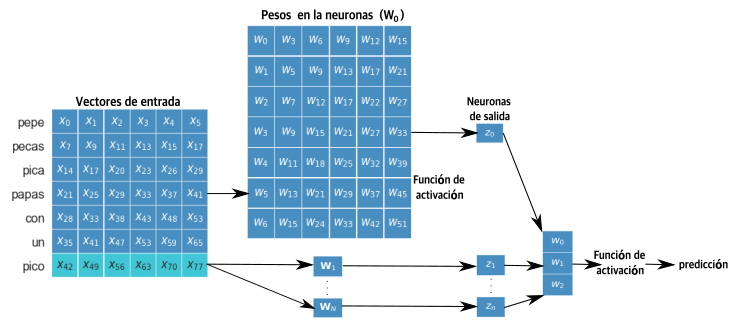|
|**Red neuronal feedforward**|

Aun cuando una red feedforward puede aprender la co-ocurrencia entre los tokens cuando se pasen como la figura previa. La red dara el mismo peso a todas las co-ocurrencias, independientemente de a la distancia que exista entre los tokens. Este tendrá como consecuencia que las palabras al principio y al final de un documento tendrán tanta importancia en la salida como las palabras en la mitad del documento, esto a pesar de su improbable relación semántica entre sí. Esta uniformidad de influencia puede causar problemas cuando considera tokens fuertes de negación y modificadores (adjetivos y adverbio). En una red  tradicional, las palabras de negación influirán en el significado de todas las palabras de la oración, incluso las que están lejos de su influencia pretendida.

Por otro lado, las redes de alimentación anticipada, como las CNN, no funcionan bien con documentos de longitud variable. No pueden manejar el texto al final de un documento si excede el ancho de su red. Mientras que las convoluciones unidimensionales proporcionan una estrategia  para lidiar capturar relaciones en ventanas de palabras solo permiten manejar ligeras variaciones en el orden de las palabras.

Para poder lidiar con ventanas de longitud variable necesitamos un mecanismoe que proporcione  **memoria** a una red neuronal. En lugar de pensar en el lenguaje como un montón de datos, puede comenzar a verlo como una secuencia de tokens, los cuales representan una secuencia en el tiempo.
 


## Redes neuronales recurrentes (RNN)

Dado que las palabras de un documento rara vez son completamente independientes entre sí; su ocurrencia influye o es influenciada por otras palabras.  Por ejemplo las siguientes dos frases:

- *The stolen car sped into the arena.* 
- *The clown car sped into the arena.*

Las dos oraciones son idénticas en la construcción, ambas tienen adjetivos, sustantivos, verbos y  preposiones. Sin embargo el adjetivo al inicio del enunciado hace que el lector infiera dos cosas situaciones distintas. Se desea aprender relaciones/dependencias con elementos que no modifica directamente a tokens que aparecen previamente ( por ejemplo el verbo `sped` o el sustantivo `arena` al suntativo `car`). Esto se puede conseguir recordando lo ocurrido en el pasado. Si es posible recordar lo que sucedió en el paso de tiempo $t$ cuando se está en tiempo $t + 1$,  se estará en camino de capturar los patrones que surgen cuando ciertos tokens aparecen en patrones relativos a otros tokens en una secuencia o documento. 

Las redes neuronales recurrentes (Recurrent neural nets RNN) son las que implementan el mecanismo para que las redes neuronales puedan recordar las palabras pasadas  un documento. La idea básico de una RNN es mostradas en la siguiente figura. 

| |
|:---:|
|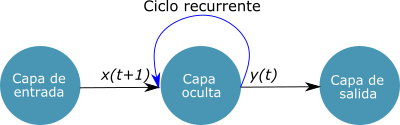|
|**Red neuronal recurrente (RNN)**|


La figura muestra un red con una sola neurona recurrente en la capa oculta, la idea es agregar un ciclo recurrente para `reutiliza` la salida de la capa oculta en el tiempo $t$ sumandola a la  entrada en el tiempo $t + 1$. De forma recursiva la nueva entrada es procesada por la red en el tiempo $t + 1$ para crear la salida para esa capa oculta en el tiempo $t + 1$.  De igual formar la salida en $t + 1$ se suma a la entrada en el tiempo $t + 2$, y se repite la recursión. 

En términos simples diríamos  que para cada entrada, se toma la salida de la red en el tiempo $t$ y se proporciona como una entrada adicional, junto con la siguiente pieza de datos en $t + 1$. Con lo anterior la  la red feedforward tiene la noción sucedió en el pasado y lo que está ocurriendo en el presente. 

Note que en este caso cada pieza de datos correspondiente a $t$ es parte del mismo documentos, el cual lo estámos procesando de manera incremental (token a token). Mientras que en la CNN y las redes feedforward es documento a documento. 

En las RNN la salida de la capa oculta además de ir a al capa de salida, es también utilizada como entrada en el siguiente paso.  Una manera fácil de ver este proceso, es expandiendo la red como en la siguiente figura. 

| |
|:--:|
|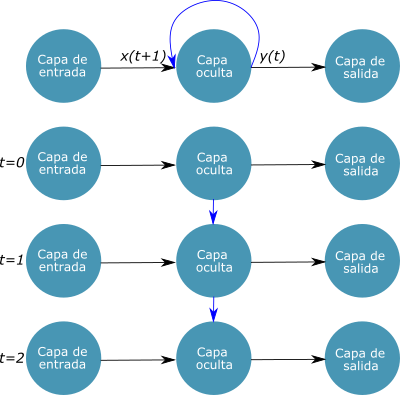|
|**RNN expandida**|

La figura muestra la RNN expandida para los tiempos  $t$, $t + 1$ y $t + 2$.
Cada paso de tiempo está representado por una misma versión de la arquitetura de la red. La red en cada paso subsiguieten es la versión futura de la red de los pasos previos. La salida de una capa oculta en un paso de tiempo $t$ se alimenta a la capa oculta junto con los datos de entrada para el siguiente paso de tiempo $t + 1$. Aun cuando tenemos tres versiones de la misma (un solo conjunto de pesos), las tres son la única red representada en una línea de tiempo. 

Cada capa tiene multiples neuronas con su conjunto de pesos asocioados, los cuales se aplican a cada elemento de cada vector de entrada, justo como en una tradicional. Pero por cada token adicional generará un  conjunto adicional de pesos produciodos por la salida de las neuronas en la capa oculta del instante de tiempo anterior. Con esto la red puedrá aprender acerca de la importancia de los eventos del "pasado" a medida que procesa la secuencia token a token. En la siguiente figura se muestra el proceso  para los instantes de tiempo $t=0$ y $t=1$. Note que la capa de salida no se activará hasta que se procese el último token en la secuencia.

| |
|:--:|
|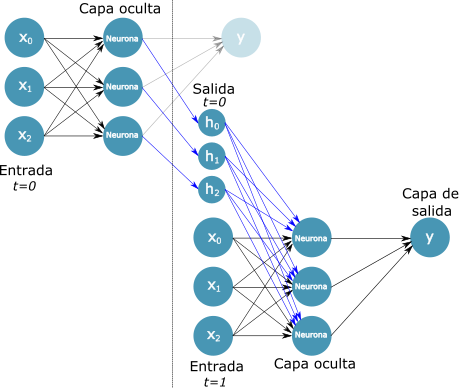|
|**Detalle RNN en $t=0$ y $t=1$**|

En una red neuronal recurrente, a diferencia de como se hacia en una CNN donde iterabamos un documentoa la vez. Ahora el proceso se realiza para cada vector de palabra que compone un documento, es decir para el primer token y obtiene la salida de la red. Luego se continua con el segundo vector, pero se incluye sambién la salida que produjo el primer vector. Después se continua con el  vector del tercer token junto con la salida del segundo token. Y así sucesivamente. Con esto la red adquiere una noción de temporalidad. La siguiete  figura muesta graficamente como se presente los datoa a una CNN y a una RNN.

| |
|:--:|
|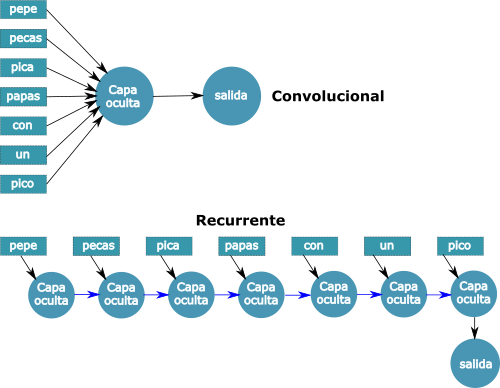|
|**Datos de entrada RNN vs CNN**|

El las tareas de aprendizaje previas, cada documento se asociaba un conjunto limitados de etiquetas (salidas). Per en el caso de RNN cada documento tendrá una salidad diferente, la cual será el token al final del documento. Los tokens son la entrada para cada paso de tiempo de la red, la entrada es una  series de tiempo. 

Así pues definimos el error que intentaresmos minizar se la con respecto del ultimo elemento en la serie. Note que a diferencia de la CNN, cada entrada la dividirememos ne partes más pequeñas que se ingresan  al red de forma secuencial y cada una de las  "submuestras" de devuelve como entrada a la red. Ya que por ahora solo nos interesa el resultado final de la red,  la pérdida se calcula en en función de la salida del último paso de tiempo en la secuencia.

### Propagación del error

Durante la propagación hacia atrás se realiza la corrección de cada peso, esto dependendo de cuánto contribuyó al error. En las RNN al introduccir cada token en la secuencia se debe calcular el error en función de la salida de la red para el tiempo anterior ($t-1$). Esto en principio podría parecer complicado de implementar y entender. Sin embargo analizando el proceso en términos del tiempo, para cada paso  $t = 0$,lo podemos apreciar como una secuencia donde cada capa se expande para generar la siguiente, la cual recibirá adicionalmente  el siguiente token la secuencia. 

La red se desenvolverá completamente al llegar al final de la secuencia, se detendrá al expasión una vez que se hayan procesado todos los tokes. En ese momento es cuando se calcurá  el error  en la salidas y se procederá a ajustar los pesos. En ese punto, puede considerar que la estructura es estática. Esto nos permite retroceder por el la misma secuencia y actualizar los pesos como en una red tradicional.

Así pues, el error del último paso se propaga hacia atrás. Para cada paso previo, se toma el gradiente con respecto al paso de tiempo más reciente. Los cambios se agregan y se aplican al conjunto único de pesos después de que se hayan calculado todos los gradientes individuales de token, hasta $t = 0$ (ver la siguiente figura).

| |
|:--:|
|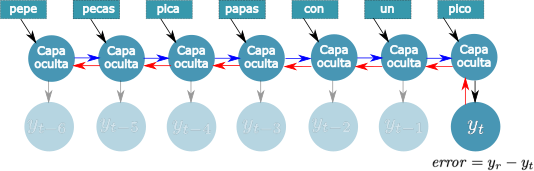|
|**Propagación del error en una RNN**|

La parte complicada del proceso de actualización es que los pesos actualizando no son realmente una rama diferente de una red neuronal. Es solo la misma red en diferentes instantes de tiempo. Es decir lo pesos son los mismos para cada paso de tiempo.

La solución simple es que los adjustes del del peso se calculen en cada paso de tiempo, pero no se actualicen inmediatamente. En una red tradicional, todas las actualizaciones de peso se calculan hasta que ya se han calculado todos los gradientes para esa entrada. En una RNN es lo mismo,  las actualizaciones se posponen hasta que se retroceda en el tiempo. 

Debido a la recursión se tiene que un peso en el paso de tiempo $t$ contribuyó  al error cuando se calculó inicialmente. Ese mismo peso recibe una entrada diferente en el paso de tiempo $t + t$ y, por lo tanto, contribuye con una cantidad diferente al error en ese momento. A medida que retrocede en el tiempo, un solo peso puede ajustarse en una dirección en un paso de tiempo $t$ (determinado por cómo reaccionó a la entrada en el paso de tiempo $t$) y luego ajustarse en otra dirección en el paso de tiempo para $t-1$ ( debido a cómo reaccionó a la entrada en el paso de tiempo $t-1$). Pero recuerde, las redes neuronales en general funcionan minimizando una función de pérdida, independientemente de la complejidad de los pasos intermedios. En conjunto, optimizará esta compleja función. A medida que la actualización de peso se aplica una vez por muestra de datos, la red se asentará (asumiendo que converge) en el peso de esa entrada para esa neurona que mejor maneja esta tarea. 

### Usando las salidas en diferentes instantes de tiempo

En una RNN también se puede calcular el erro utilizando las salidas intermedias. El error se calcula a tráves de  toda la ruta para cada instanten de tiempo y al final se propagará  hacia atrás para ajustar todos los pesos de la red. Este proceso es como la propagación inversa normal a través del tiempo durante $n$ pasos de tiempo.  Se propagará hacia atrás desde el último paso de tiempo hasta el primero. Luego, hace lo mismo con el error calculado en el penúltimo paso de tiempo y suma todos los cambios hasta $t = 0$. Repite este proceso hasta que regreses al e tiempo 0 y luego se propaga hacia atrás. Al final, se aplica el total  de las actualizaciones a los correspondientes pesos de capa oculta. Este proceso estaría representado por las flechas azules y rojas en la siguiente figura.

| |
|:--:|
|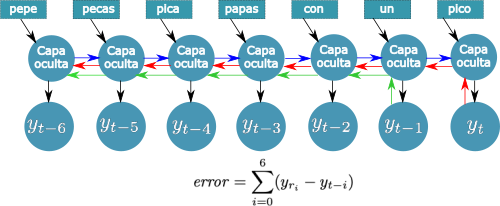|
|**Uso de múltiples salidas de RNN**|

En la figura anterior, se puede ver que el error se propaga hacia atrás desde cada salida hasta $t = 0$ (), y se suman, antes de actualizar los pesos de la red. Al igual que con una red estándar,  se actualizan los pesos solo después de haber calculado el cambio para todo el paso de retropropagación para esa entrada (o conjunto de entradas). En el caso de una red neuronal recurrente, esta propagación inversa incluye las actualizaciones hasta el tiempo $t = 0$.

Actualizar los pesos antes viciaria los cálculos de gradiente para instantes de tiempo más tempranos. Recuerde que el gradiente se calcula con respecto a un peso en particular. Si se actualizara antes, por ejemplo en el tiempo $t-4$, cuando vaya a calcular el gradiente en el paso de tiempo $t-3$, el valor del peso habría cambiado. Con este proceso se obtiene una red que puede capturar el concepto de tiempo para mantener un recuerdo de las ocurrencias en la línea de tiempo. 

Aunque una red neuronal recurrente puede tener menos parámetros para aprender, debido a la recursión puede ser costosa de entrenar. Como podrá apreciar en la figuras la profundidad de la red dependede la longitud de la secuencia. Cuantos más tokens tenga, más atrás en el tiempo debe propagarse cada error. Para cada paso atrás en el tiempo, hay cada vez más derivadas para calcular. Además tambié está el factor del devaneciemento del gradiente. La idea es que a medida que una red se vuelve más profunda (más capas), la señal de error puede crecer o disiparse con cada cálculo del gradiente.  Aunque la mayoría de las RNN usen pocas capas de profundidad, estas se expanden en función del número de tokens. Llegar al fondo de una red de cien capas de profundidad será difícil. Aunque el gradiente puede desaparecer o explotar en el camino hacia el último conjunto de pesos, en una RNN solo se está actualizando un conjunto de pesos. Y ese conjunto de pesos es el mismo en cada paso de tiempo.

## RNN en Keras

Utilizaremos el conjunto de datos de humor que utilizamos para entrenar la CNN. De igual forma primero, leeremos el conjunto de daots. Luego lo tokenizamos y producimos la versión utilizando `glove`. Y finalmente lo dividiremos en conjunto de prueba y entrenamiento.

In [2]:
# cargamos los tweets de humor
train_df=pd.read_csv('data/humor/train_english.tgz', compression='gzip',usecols=['is_humor','text'])
test_df=pd.read_csv('data/humor/dev_english.csv',usecols=['is_humor','text'])
train_df=train_df.dropna().astype({'is_humor': 'int32'})
test_df=test_df.dropna().astype({'is_humor': 'int32'})

In [3]:
import gensim.downloader as api
#Usaremos los de glove de dimension 25 por que es el más pequeño
word_vectors= api.load('glove-twitter-25')
#Implementar la funcion para generar los vectores

In [4]:
#Vectorizar los conjuntos de entrenamiento y prueba

In [5]:
#Dividir el conjunto de entrenamiento en 80/20 para probar el aprendizaje de la red

Los hiperparámetros para este modelo serán: máximo 20 tokens por ejemplo, con batches de 32. La dimensión del embedding  es de 25 y la entrenaremos durante 2 epócas.

In [6]:
maxlen=20
batch_size = 32
embedding_dims =25
epochs = 2

En general, cuando se utilizan RNN no es necesario completar o truncar, ya que las RNN pueden manejar secuencias de entrada de longitud variable. Pero para este modelo que implementaremos se requiere que sus secuencias tengan la misma longitud.

In [7]:
#Implemtar pad_trunc

Una vez que ya hemos preprocesado los datos y generado las versiones completdas/truncadas. Usaremos nuevamentes la clase `Sequential` para definir la arquitectura de nuestrá red. Una vez instaciado el modelo, agregamos una  capa recurrente.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, SimpleRNN
num_neurons = 100
modelo = Sequential()
modelo.add(SimpleRNN(num_neurons, return_sequences=True, 
                    input_shape=(maxlen, embedding_dims)))

Ahora ya tenemos la arquitectura básica de una RNN. Dado que ajustamos todas las secuencias longitud 20 y estamos utilizando 50 neuronas en la capa oculta, la salida de  esta capa será un vector de 20 elementos de longitud, donde cada elemento tendrá a su vez una longitu de 50.

In [25]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 20, 100)           12600     
Total params: 12,600
Trainable params: 12,600
Non-trainable params: 0
_________________________________________________________________


El argumento  `return_sequences` indica a la red que devuelva el valor de la red en cada paso de tiempo, de ahí los 20 vectores, cada uno de 20 valores. Si `return_sequences` se pone como  **False** (el comportamiento predeterminado de Keras), solo se devolvería un vector de 20 dimensiones (solo la última capa de salida).
Para este ejemplo elección de 20 neuronas fue arbitraria, aumentar o disminuir  el número afectará el tiempo de entrenamiento. El estudiante puede experimentar con este número y ver cómo afecta el tiempo de cómputo y la precisión del modelo.

Una buena regla general es intentar que el modelo no sea más complejo que los datos con los que está entrenando. Un modelo más complejo sobreajustará los datos de entrenamiento y no generalizará bien; un modelo demasiado simple se ajustará a los datos y tampoco tendrá mucho que decir sobre los datos novedosos. Esta discusión se conoce como la compensación de sesgo versus varianza. Se dice que un modelo que se adjusta demasiado a los datos tiene una alta varianza y un sesgo bajo. Y un modelo inadecuado es lo opuesto: baja variación y alto sesgo; se equivoca todo de forma coherente.

El truncado, compledado se hizo para proporcionar una comparación con el ejemplo de CNN. Pero cuando se usa una red neuronal recurrente, no es necesario truncar y rellenar. Ya que la red puede manejar datos de entrenamiento de diferentes longitudes y expandir la recursión hasta que llegue al final de la entrada (Keras se encargará de esto automáticamente). El problema es que la salida de la capa recurrente variará de una entrada a otra. Una entrada de cuatro tokens generará una secuencia de cuatro elementos de salida. Una secuencia de 20 tokens producirá una salida de 20 elementos. Si necesita pasar esto a otra capa, una que espera una entrada uniforme, no funcionará.

Nuestra RNN simple devolverá las secuencias completas, esto podría provocar sobre-ajuste, para evitarlo podemos agregat una capa de `Dropout` para descartar el 20% de esas entradas, en cada ejemplo de entrada. Finalmente usaremos  una capa para clasificar si cada entrada es o no un chiste. Para ello usaremos una capa `Dense`  con una única neurona y una función de activación sigmoide. 

Pero una capa `Dense` espera un vector "plano" de n elementos como entrada. Y los datos que salen de `SimpleRNN` son un tensor de 20 elementos, y a su vez cada uno de ellos tiene 20 elementos de largo. Por lo anterior utilizaremos una capa `Flatten`, la cual se utiliza para aplanar la entrada de un tensor de 20 x 20 a un vector de 400 elementos. Este vector será la capa. En realidad, la capa Flatten es un mapeo.

In [17]:
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(1, activation='sigmoid'))

In [11]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20, 20)            920       
_________________________________________________________________
dropout (Dropout)            (None, 20, 20)            0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 401       
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Al pasar el "vector de pensamiento" producido por la capa recurrente a una red de retroalimentación ya no se  mantiene el orden de la entrada que trató de incorporar. Pero lo importante es notar que el "aprendizaje" relacionado con la secuencia de tokens ocurre en la propia capa RNN; la agregación de errores a través de la retropropagación a través del tiempo está codificando esa relación en la red y expresándola en el “vector de pensamiento” mismo. Su decisión basada en el vector de pensamiento, a través del clasificador, proporciona retroalimentación a la "calidad" de ese vector de pensamiento con respecto a su problema de clasificación específico.

### Compilar y entrenar

Ahora compilaremos el model tal y como realizamos con la CNN.  A medida que sus modelos se vuelven cada vez más complicados, realizar un seguimiento de cómo cambian por lo que es recomendable el registro frecuente del método  `summary()`. Aunque también es posible  automatizar gran parte del proceso de construcción (recuerde el modelo multicanal de CNN).

In [18]:
modelo.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20, 100)           12600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 100)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 14,601
Trainable params: 14,601
Non-trainable params: 0
_________________________________________________________________


Analicemos el número de parámetros con los que está trabajando. Esta red neuronal relativamente pequeña, solo aprenderá 14601 parámetros.  Veamos de donde proviene cada número. En la capa `SimpleRNN`, tenemos 100 neuronas. Cada una de esas neuronas aplicará un peso a un valor de cada muestra de entrada. En una `RNN`, la entrada en cada paso de tiempo es un token. Los tokens están representados por vectores de palabras en este caso, cada uno de 25 dimensiones. Cada neurona necesitará 25 pesos:

$100*25=2500$

Cada neurona requiere también un termino par el sesgo, recuerde que es un valor constante de 1, pero con un peso ajustable. Tendremo uno por cada neurona:

$2500 + 100 \textit{(un peso para cada nerona de sesgo)}=2600$

En el primer insante de tiempo la primera capa tendrá 2600 pesos. Cada una de las salidas de las 50 neuronas se usará como entrada para el siguiente paso de tiempo. Cada neurona acepta el vector de entrada completo, así como el vector de salida completo. En el primer paso de tiempo, la retroalimentación de la salida aún no existen. Se inicia como un vector de ceros, su longitud es la misma que la longitud de la salida.

Cada neurona en la capa oculta ahora tiene pesos para cada dimensión  en el embedding del token: eso es 25 pesos. También tiene 1 peso de sesgo para cada neurona. Y tiene los 100 pesos para los resultados de salida en el paso de tiempo anterior (o ceros para el primer paso de tiempo $t = 0$). Los 100 pesos son el paso de retroalimentación de la red neuronal recurrente. Entonces tenemos:

$25+1+100=126$

eso por cada una de las 100 neuronas nos da el número de parámetros entrenables  de la RNN

$126*100=12600$

Para está red simple estamos desenrollando 25 pasos de tiempo (conforme ese número aumente los problemas asociados con los desvanecimienteo de gradientes pueden aparecer. Aún con los posibles problema de gradiente, una RNN resulta efectiva, dado que los parámetros (en este caso 12600) son los mismos en cada uno de los niveles de recursión, y se mantienen hasta que se calculen todo propagación hacia atrás.  Las actualizaciones de las ponderaciones se producen a la vez al final de la propagación hacia adelante de la secuencia y la propagación hacia atrás posterior. Aunque está agregando complejidad al algoritmo de backpropagation, en este caso en vez de entrenar los $315K$ (en caso de que cara recursión tuviera sus propios parámetros)  solo entrenamos 12600. 
La última capa del resumen tine 2001 parámetros para entrenar, lo cual es relativamente sencillo. Después de la capa de aplanado (`Flatten`), la entrada es un vector de 2000 dimensiones más la entrada de un neurona de sesgo. Sumando tenemos:

$12600+2001$ que es lo que reporta `summary`

In [19]:
12600*25

315000

#### Entrenar la RNN

Esta actividad se dejará como ejercicio al estudiande. Al igual que con sus otros modelos de Keras, se  proporcionar al método `fit` los datos de entrada, el tamaño del batch y el número de epócas. 


### Hiperparámetros

Al igual que para todos los modelos de aprendizaje,  encontrar el conjunto óptimo de hiperparámetros es un problema muy complicado. Sin embargo,  la intuición y la experiencia pueden aydudar a encotrar solución es aceptables. Algunos de los parámetros que podemos ajustar son: 

- El número de tokens por documento (`maxlen`).  Este dependerá del conjunto entrenamiento, y puede varía ampliamente en la longitud de la muestra. Los procesos de truncado y completado pueden hacer que se pierda información y se introduzca ruido. Además cambiar este número afecta el tiempo de entrenamiento más que cualquier otro parámetro en este modelo; la longitud de las muestras individuales determina cuántas y cuánto tiempo atrás debe propagarse el error. No es estrictamente necesario con redes neuronales recurrentes. Sin embargo, si es necesario (como en el ejemplo) cuando el resultado se alimenta directamente a capas de entrada de tamaño uniforme.
- La dimensión y el tipo del embedding (`embedding_dimension`). Este valor depende del VSM utilizado (en nuestro caso glove 25), pero se puede utilizar cualquier otro. Incluso algo tan simple como una codificación `one-hot` de los $k$ tokens más comunes del corpus pueden ser suficientes para algunos problemas.
- El tamaño del bacth (`batch_size`). Aumentar el tamaño acelera el entrenamiento porque reduce la cantidad de veces que se calcula la propagación hacia atrás (la parte computacionalmente costosa). Sin embargo, valores más grandes  aumentan la posibilidad de caer en un mínimo local.
- Número de épocas  (`epochs`). Este parámetro es relaticamente fácil de probar y ajustar, simplemente ejecutando el proceso de entrenamiento nuevamente. Otra alternativa es agregar una llamada con `ModelCheckpoint`, para guardar el modelo cada que se tenga una mejora en la medida de bondad.
```
from keras.callbacks import ModelCheckpoint
# se guarda el modelo cada que hay una mejora en la funcion de perdida del conjunto validacio
# el nombre de arachivo es model+ el númeroo de epoca + train accuracy + validation accuray
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', 
                                verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
# Si me es un modelo Keras
m.fit(epochs=10, callbacks=[checkpoint]) 
```
- Número de neuronal (`num_neurons`). Este parámetro es importante. Ya que su mala elección puede provocar sobre aprendizaje o no tener un modelo que aprenda. Se deja como ejercicio al alumno comprobar con varios valores. Por ejemplo usar 200 neuronas. El siguiente snipet de código muestra como se usarían 200 neuronas y se salvaría el modelo cada que mejore la función de perdida sobre el conjunto de validación.

```
num_neurons = 200
modelo = Sequential()
modelo.add(SimpleRNN(num_neurons, return_sequences=True, input_shape=(maxlen, embedding_dims)))
modelo.add(Dropout(.2))
modelo.add(Flatten())
modelo.add(Dense(1, activation='sigmoid'))
modelo.compile('rmsprop', 'binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', 
                              verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
modelo.fit(train, y, callbacks=[checkpoint],epochs=epochs,
           batch_size=32,validation_data=(validation,yv))
```


#### Predecir

Al igual que para una CNN, el modelo entrenado se puede utilizar para predecir entradas nuevas. Listamos brevemente el proceso completo para un documento hipotético `doc`:
- Primero vectorizamos `doc` aplicando el mismo tokenizador y vectorizador. Obtenemos el vector $x_{doc}$.
- Realizamos el proceso de completado/truncado para $x_{doc}$
- Si es necesario hacemos reshape para generar un vector de $\textit{maxlen} \times \textit{embedding_dim}$ 
- Usamos el método `predict` del modelo entrenado.

Los pasos son los mismo para un colección de documentos. 

#### Statefulness  

Cuando se desea recordar información de una muestra de entrada a la siguiente, no solo un paso (token) al siguiente dentro de la misma muestra. Keras proporciona un argumento de palabra clave en la capa RNN base (por lo tanto, también en SimpleRNN) llamado `stateful`. Su valor predeterminado es `False`. Si ser habilita esto al agregar la capa SimpleRNN, la última salida de la última muestra pasa a sí misma en el siguiente paso junto con la primera entrada del token.  Un modelo `stateful` puede ser una buena idea cuando desee modelar un documento grande que se ha dividido en párrafos u oraciones para su procesamiento. Pero no cuado los documentos no están realcionado entre sí. Si se usa `stateful` la capa RNN necesitara conocer el tamaño del bacth para pasar la última entrada del batch anterior a la primera del siguiente.

In [23]:
modelost = Sequential()
modelost.add(SimpleRNN(num_neurons, return_sequences=True, stateful=True, batch_size=batch_size,
                       input_shape=(maxlen, embedding_dims)))
modelost.add(Dropout(.2))
modelost.add(Flatten())
modelost.add(Dense(1, activation='sigmoid'))
modelost.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (32, 20, 100)             12600     
_________________________________________________________________
dropout_3 (Dropout)          (32, 20, 100)             0         
_________________________________________________________________
flatten_3 (Flatten)          (32, 2000)                0         
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   2001      
Total params: 14,601
Trainable params: 14,601
Non-trainable params: 0
_________________________________________________________________


### RNNs bi-direccionales


Una RNN bi-direccional ayudaría a modeladar situaciones donde lo que ocurre en el presente es relevante para entender el pasada. Por ejemplo en la frase `La muerte una parte natural de la vida es`(Yoda), tenemos que regresar al inicio para saber que es parte natural de la vida. Cuando leemos lo hacemos en una solo dirección, pero es frecuente que tengamos regresar rápidamente a las primeras partes del texto conforme se va teniendo nueva información. Los seres humanos podemos manejar información que no se presenta en el mejor orden posible. Y nos gustaría que  un modelo también pueda volver sobre sus pasos. El  modelo que puede hacerlo es un redes neuronale recurrente bidireccional. Keras agregó un wrapper de capa que automáticamente cambiaria las entradas en salidas necesarias yo cone ello podemos construir una RNN bidireccional.

In [26]:
from keras.layers.wrappers import Bidirectional

In [28]:
modelob = Sequential()
modelob.add(Bidirectional(SimpleRNN(num_neurons, return_sequences=True),input_shape=(maxlen, embedding_dims)))
modelob.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 20, 200)           25200     
Total params: 25,200
Trainable params: 25,200
Non-trainable params: 0
_________________________________________________________________


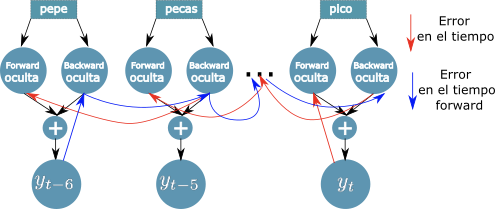

La idea básica es colocar dos RNN, una en la entrada se pasa de izquierda a derecha y  la otra de derecha a izauierda hacia atrás. La salida de las dos se concatena en cada paso de tiempo con el paso de tiempo relacionado (el mismo token de entrada) en la otra red. Posteriormente se toma la salida del paso de tiempo final en la entrada y la concatena con la salida generada por el mismo token de entrada en el primer paso de tiempo de la red hacia atrás. Con estas herramientas, ya es posible hacer tareas más complejas  que solo clasificar texto, en teoría también es posible modelar el uso del lenguaje. Con una comprensión profunda es posible no solo comprender el lengujage, sino incluso también producirlo 